# CLUSTERING ON INDEKS PEMBANGUNAN MANUSIA
## TAHUN 2004-2012

### READ DATA

In [1]:
#Import Library Pandas dan Numpy
import pandas as pd
import numpy as np

#Membaca file CSV ke dalam datafarame Pandas
dataset = pd.read_csv('./Downloads/ipm.csv')

#Menampilkan Jumlah Record dan Feature pada dataset
print("Shape of dataset : ", dataset.shape)

# Menampilkan 5 data awal pada dataset
dataset.head(5)


Shape of dataset :  (4473, 10)


,nama_provinsi,kode_kabkota,nama_kabkota,koordinat_kabkota,tahun,angka_harapan_hidup,angka_melek_huruf,lama_sekolah,pengeluaran_perkapita,ipm
0,Prov. Nanggroe Aceh Darussalam,1101,Kab. Simeulue,"2.62818,96.0898",2004,62.4,94.500000,6.100000,596.21,64.492050
1,Prov. Nanggroe Aceh Darussalam,1102,Kab. Aceh Singkil,"2.439,97.9244",2004,63.0,96.222065,7.672969,588.20,65.756200
2,Prov. Nanggroe Aceh Darussalam,1103,Kab. Aceh Selatan,"3.25638,97.213",2004,65.5,95.662192,8.091445,582.46,66.888490
3,Prov. Nanggroe Aceh Darussalam,1104,Kab. Aceh Tenggara,"3.59968,97.6619",2004,68.6,96.036751,9.342572,580.19,69.445846
4,Prov. Nanggroe Aceh Darussalam,1105,Kab. Aceh Timur,"4.56983,97.7723",2004,68.5,96.700000,8.057778,568.91,67.717058


### DATA CLEANING

In [2]:
# Cek Missing Value
missing = dataset.isnull().sum()
missing

nama_provinsi              0
kode_kabkota               0
nama_kabkota               0
koordinat_kabkota          0
tahun                      0
angka_harapan_hidup      209
angka_melek_huruf        209
lama_sekolah             209
pengeluaran_perkapita    209
ipm                      209
dtype: int64

In [3]:
#Membersihkan data dengan menghapus record yang terdapat missing value
print ("Shape of dataset before cleaning: ", dataset.shape)
dataset = dataset.dropna()
print ("Shape of dataset after cleaning: ", dataset.shape)
dataset.head(5)

Shape of dataset before cleaning:  (4473, 10)
Shape of dataset after cleaning:  (4264, 10)


,nama_provinsi,kode_kabkota,nama_kabkota,koordinat_kabkota,tahun,angka_harapan_hidup,angka_melek_huruf,lama_sekolah,pengeluaran_perkapita,ipm
0,Prov. Nanggroe Aceh Darussalam,1101,Kab. Simeulue,"2.62818,96.0898",2004,62.4,94.500000,6.100000,596.21,64.492050
1,Prov. Nanggroe Aceh Darussalam,1102,Kab. Aceh Singkil,"2.439,97.9244",2004,63.0,96.222065,7.672969,588.20,65.756200
2,Prov. Nanggroe Aceh Darussalam,1103,Kab. Aceh Selatan,"3.25638,97.213",2004,65.5,95.662192,8.091445,582.46,66.888490
3,Prov. Nanggroe Aceh Darussalam,1104,Kab. Aceh Tenggara,"3.59968,97.6619",2004,68.6,96.036751,9.342572,580.19,69.445846
4,Prov. Nanggroe Aceh Darussalam,1105,Kab. Aceh Timur,"4.56983,97.7723",2004,68.5,96.700000,8.057778,568.91,67.717058


### FEATURE SELECTION

In [4]:
# Memilih fitur yang akan digunakan, dalam kasus ini fitur yang dibutuhkan hanya 1 fitur
# yaitu fitur ipm. kemudian fitur ipm digrup kedalam nama_provinsi 
# Fitur tersebut kemudian dimasukkan ke dalam variabel avg_ipm dimana isinya merupakan rata-rata
# indeks pembangunan manusia berdasarkan nama provinsi

avg_ipm = dataset.groupby('nama_provinsi')['ipm'].mean()
print('Rata-rata IPM:\n', avg_ipm)

Rata-rata IPM:
 nama_provinsi
Prov. Bali                         71.394288
Prov. Banten                       70.839972
Prov. Bengkulu                     69.712691
Prov. D I Yogyakarta               74.515497
Prov. DKI Jakarta                  76.556860
Prov. Gorontalo                    69.157070
Prov. Jambi                        72.235563
Prov. Jawa Barat                   71.658552
Prov. Jawa Tengah                  71.457085
Prov. Jawa Timur                   69.494746
Prov. Kalimantan Barat             67.199175
Prov. Kalimantan Selatan           69.576503
Prov. Kalimantan Tengah            72.740934
Prov. Kalimantan Timur             73.598787
Prov. Kepulauan Bangka Belitung    70.675152
Prov. Kepulauan Riau               72.515945
Prov. Lampung                      70.352195
Prov. Maluku                       69.987349
Prov. Maluku Utara                 68.116775
Prov. Nanggroe Aceh Darussalam     70.711394
Prov. Nusa Tenggara Barat          64.089688
Prov. Nusa Tenggara Timur

### CLUSTERING USING K-MEANS

In [41]:
# Selanjutnya kita akan melakukan clustering dengan menggunakan Kmeans
# Import Kmeans dari library Sklearn
from sklearn.cluster import KMeans


# Kita akan membagi data menjadi 3 cluster yaitu ipm dengan pendapatan rendah, sedang dan tinggi
# Sehingga n_clusters=3, initial centroidnya random, dan banyak n_initialnya = 1.
clustering = KMeans(n_clusters=3, init="random", n_init=1)

# Fit Model cluster yang sudah dibuat pada data rata-rata ipm per provinsi
clusters=clustering.fit_predict(avg_ipm.values.reshape(-1, 1))

# Hasil Clustering
print('\nHasil clustering:\n', clusters)

#Nilai SSE pada n_cluster = 3
print('\nSSE = : ', clustering.inertia_)



Hasil clustering:
 [1 1 1 2 2 1 2 2 1 1 1 1 2 2 1 2 1 1 1 1 0 0 0 0 2 1 1 1 1 2 2 1 2]

SSE = :  75.72308987762672


### EVALUATION MODEL USING ELBOW METHOD

In [42]:
# Pada bagian ini akan dilakukan evaluasi dengan menghitung nilai SSE dari n_cluster
K = range(1,10)
sse = []
for k in K:
    km = KMeans(n_clusters = k, init="random", n_init=1)
    km.fit(avg_ipm.values.reshape(-1, 1))
    sse.append(km.inertia_)

sse

[356.59987007287384,
 157.29218623814165,
 75.15996113707094,
 54.96528558595193,
 39.257514913138415,
 16.584378357911667,
 12.22089314839168,
 11.587099479422642,
 5.389089119309445]

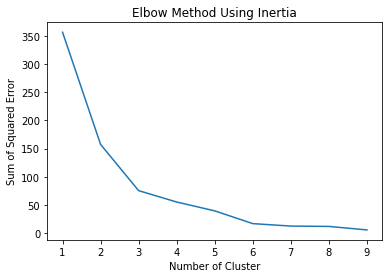

In [43]:
# Untuk lebih mudah memahami nilai SSE pada n_cluster
# maka akan dilakukan visualiasi menggunakan Matplotlib
from matplotlib import pyplot as plt

plt.title('Elbow Method Using Inertia')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error')
plt.plot(K,sse)

### CLUSTERING USING AGGLOMERATIVE

In [44]:
# Pada tahap ini kita akan memberikan sebuah label terhadap hasil cluster yang sudah didapat

# Import fungsi Agglomerative Clustering dari library sklearn
from sklearn.cluster import AgglomerativeClustering

# Memodelkan fungsi Agglomerative Clustering
clustering=AgglomerativeClustering(n_clusters=3, linkage='average')

# Menerapkan fungsi Agglomerative Clustering tehadap rata-rata ipm
clusters=clustering.fit_predict(avg_ipm.values.reshape(-1, 1))
avg_ipm=pd.DataFrame({'Provinsi':avg_ipm.index, 'Rata-Rata IPM':avg_ipm.values, 'Cluster':clusters})

# Mencari nilai centroid dari tiap klaster
centroid_perdata=avg_ipm.groupby('Cluster')['Rata-Rata IPM'].transform('mean')
centroid=np.unique(centroid_perdata)

# Mengurutkan nilai centroid tiap klaster dari yang terendah sampai tertinggi
sorted_centroid=np.sort(centroid)

# Mengelompokkan nilai centroid ke dalam beberapa kategori, yaitu rendah, sedang dan tinggi
rendah, sedang, tinggi = sorted_centroid[0], sorted_centroid[1], sorted_centroid[2]
category=centroid_perdata.map({rendah:'rendah', sedang:'sedang', tinggi:'tinggi'})
avg_ipm['Category']=category

# Menampilkan hasil pengelompokkan tiap centroid ke dalam kategori rendah, sedang, dan tinggi
print(avg_ipm[['Provinsi', 'Category']])

                           Provinsi Category
0                        Prov. Bali   sedang
1                      Prov. Banten   sedang
2                    Prov. Bengkulu   sedang
3              Prov. D I Yogyakarta   sedang
4                 Prov. DKI Jakarta   tinggi
5                   Prov. Gorontalo   sedang
6                       Prov. Jambi   sedang
7                  Prov. Jawa Barat   sedang
8                 Prov. Jawa Tengah   sedang
9                  Prov. Jawa Timur   sedang
10           Prov. Kalimantan Barat   sedang
11         Prov. Kalimantan Selatan   sedang
12          Prov. Kalimantan Tengah   sedang
13           Prov. Kalimantan Timur   sedang
14  Prov. Kepulauan Bangka Belitung   sedang
15             Prov. Kepulauan Riau   sedang
16                    Prov. Lampung   sedang
17                     Prov. Maluku   sedang
18               Prov. Maluku Utara   sedang
19   Prov. Nanggroe Aceh Darussalam   sedang
20        Prov. Nusa Tenggara Barat   sedang
21        

### VISUALISASI CLUSTERING

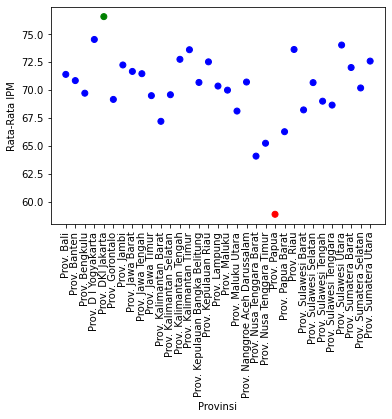

In [45]:
# Pada tahap ini kita akan memvisualisasikan hasil clustering ke dalam scatter plot

x=avg_ipm.index
y=avg_ipm['Rata-Rata IPM']
colors={'rendah':'red', 'sedang':'blue', 'tinggi':'green'}
fig, ax = plt.subplots()
ax.scatter(x, y, c=avg_ipm['Category'].apply(lambda x:colors[x]))

plt.xlabel('Provinsi')
plt.ylabel('Rata-Rata IPM')
plt.xticks(x, avg_ipm['Provinsi'], rotation=90)
plt.show()